In [1]:
%load_ext autoreload
%autoreload 2
import eval_models
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
X_art_train,X_art_test,y_art_train,y_art_test=eval_models.get_train_test("artificial")

## No standarization at all

In [3]:
RF = RandomForestClassifier(n_jobs=-1, max_depth=6)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_art_train.values,y_art_train)
X_art_train_boruta=X_art_train.iloc[:,feat_select.support_]
X_art_test_boruta=X_art_test.iloc[:,feat_select.support_]

In [4]:
noscaling_res=eval_models.get_models_ba(X_art_train_boruta,
                              X_art_test_boruta,
                              y_art_train,
                              y_art_test
                             )

LogisticRegression 0.624
RandomForestClassifier 0.886
AdaBoostClassifier 0.638
LGBMClassifier 0.866
XGBClassifier 0.878
21  features in the dataset


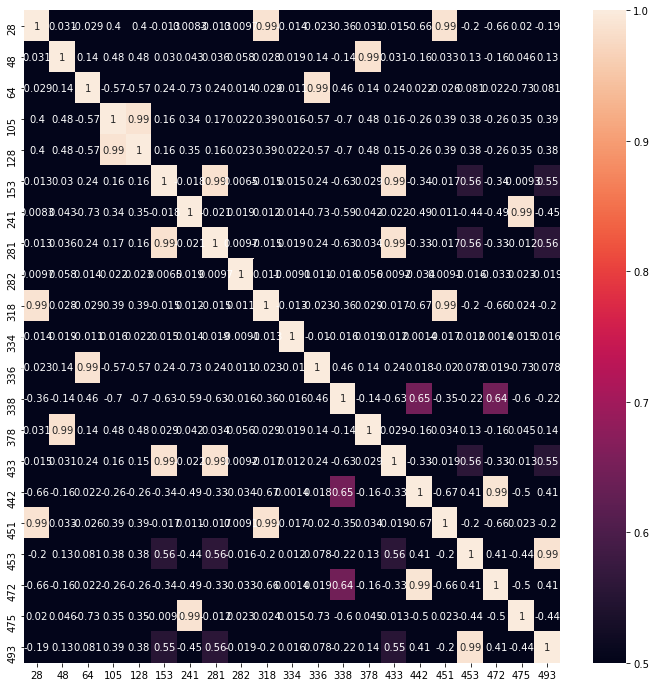

In [5]:
plt.figure(figsize=(12,12))
corr = X_art_train_boruta.corr()
sns.heatmap(corr,annot=True,vmin=0.5,vmax=1)
plt.show()

In [6]:
X_train_no_corr=eval_models.delete_corr(X_art_train_boruta)

In [7]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr,
                              X_art_test_boruta,
                              y_art_train,
                              y_art_test
                             )

LogisticRegression 0.628
RandomForestClassifier 0.884
AdaBoostClassifier 0.644
LGBMClassifier 0.876
XGBClassifier 0.88
11  features in the dataset


## Standarization after Boruta (not really expecting it to work)

In [8]:
X_art_train_boruta_sc,X_art_test_boruta_sc=eval_models.standarize(X_art_train_boruta,X_art_test_boruta)

In [9]:
X_train_no_corr2=eval_models.delete_corr(X_art_train_boruta_sc)

In [10]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr2,
                              X_art_test_boruta_sc,
                              y_art_train,
                              y_art_test
                             )

LogisticRegression 0.63
RandomForestClassifier 0.878
AdaBoostClassifier 0.644
LGBMClassifier 0.884
XGBClassifier 0.88
11  features in the dataset


## Standarization before Boruta

In [11]:
X_art_train_sc,X_art_test_sc=eval_models.standarize(X_art_train,X_art_test)

In [12]:
### (suggested max_depth between 3 and 7) podobno
RF = RandomForestClassifier(n_jobs=-1, max_depth=7)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_art_train_sc.values,y_art_train)
X_art_train_sc_boruta=X_art_train_sc.iloc[:,feat_select.support_]
X_art_test_sc_boruta=X_art_test_sc.iloc[:,feat_select.support_]

In [13]:
scaled_res=eval_models.get_models_ba(X_art_train_sc_boruta,
                              X_art_test_sc_boruta,
                              y_art_train,
                              y_art_test
                             )

LogisticRegression 0.636
RandomForestClassifier 0.888
AdaBoostClassifier 0.634
LGBMClassifier 0.878
XGBClassifier 0.874
20  features in the dataset


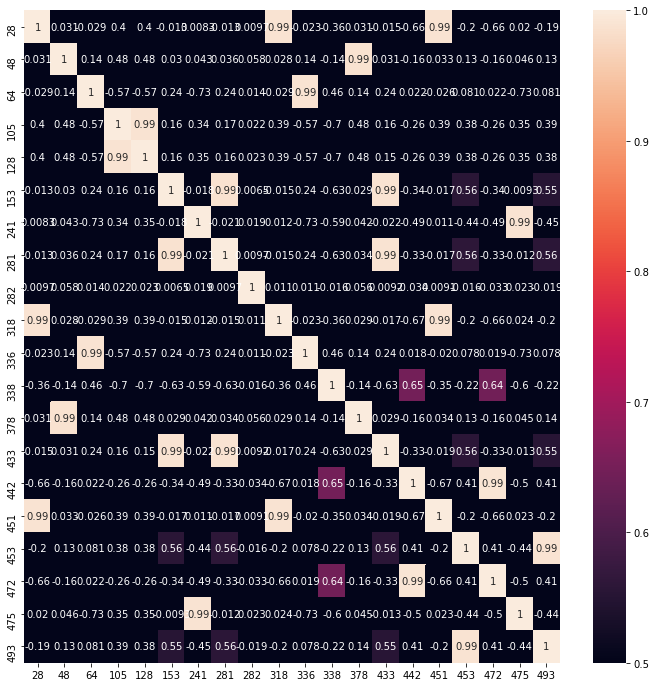

In [14]:
plt.figure(figsize=(12,12))
corr = X_art_train_sc_boruta.corr()
sns.heatmap(corr,annot=True,vmin=0.5,vmax=1)
plt.show()

In [15]:
X_art_train_sc_no_corr=eval_models.delete_corr(X_art_train_sc_boruta)

In [16]:
scaled_res_cor=eval_models.get_models_ba(X_art_train_sc_no_corr,
                              X_art_test_sc_boruta,
                              y_art_train,
                              y_art_test
                             )

LogisticRegression 0.632
RandomForestClassifier 0.888
AdaBoostClassifier 0.62
LGBMClassifier 0.872
XGBClassifier 0.888
10  features in the dataset


## Cross validation (with standarization before Boruta)

In [17]:
kf = KFold(n_splits=5,shuffle=True)
models_res=[]
for train_idx, val_idx in tqdm(kf.split(X_art_train)):
    X_train=X_art_train.iloc[train_idx,:]
    X_val=X_art_train.iloc[val_idx,:]
    y_train=y_art_train[train_idx]
    y_val=y_art_train[val_idx]
    
    X_train_sc,X_val_sc=eval_models.standarize(X_train,X_val)
    
    RF = RandomForestClassifier(n_jobs=-1, max_depth=6)
    feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
    feat_select.fit(X_train.values,y_train)
    
    X_train_sc_boruta=X_train_sc.iloc[:,feat_select.support_]
    X_val_sc_boruta=X_val_sc.iloc[:,feat_select.support_]
    

    with open('../data/boruta/artificial-features.csv', 'a') as f:
        np.savetxt(f, np.where(feat_select.support_), delimiter=",", fmt='%i')
    f.close()
    X_train_sc_boruta_no_corr=eval_models.delete_corr(X_train_sc_boruta)
    tmp=eval_models.get_models_ba(X_train_sc_boruta_no_corr,X_val_sc_boruta,y_train,y_val)
    models_res.append(tmp)

0it [00:00, ?it/s]

LogisticRegression 0.5695
RandomForestClassifier 0.8539
AdaBoostClassifier 0.6013
LGBMClassifier 0.8418


1it [01:19, 79.32s/it]

XGBClassifier 0.8355
10  features in the dataset
LogisticRegression 0.5905
RandomForestClassifier 0.865
AdaBoostClassifier 0.6848
LGBMClassifier 0.8556


2it [02:26, 72.29s/it]

XGBClassifier 0.852
10  features in the dataset
LogisticRegression 0.5998
RandomForestClassifier 0.8244
AdaBoostClassifier 0.6449
LGBMClassifier 0.8142


3it [03:04, 56.46s/it]

XGBClassifier 0.831
10  features in the dataset
LogisticRegression 0.5906
RandomForestClassifier 0.8769
AdaBoostClassifier 0.6001
LGBMClassifier 0.847


4it [03:55, 54.22s/it]

XGBClassifier 0.8433
11  features in the dataset
LogisticRegression 0.6532
RandomForestClassifier 0.8511
AdaBoostClassifier 0.6516
LGBMClassifier 0.841


5it [05:03, 60.76s/it]

XGBClassifier 0.8413
12  features in the dataset


In conclusion we could expect sth around 0.84 balanced accuracy score with 10 features.
We could use some other method to select only the 5 best ones. Nie wiem czy jest sens bo użycie 10 zamiast 5 to kara na poziomie 1 punktu procentowego

### Having run Boruta x times we will select only those variables which have been selected at least 95% of the time
remember to specify x_times!

In [19]:
x_times=5
boruta_all_results=pd.read_csv('../data/boruta/artificial-features.csv',header=None,sep="\n")
boruta_all_results=boruta_all_results.iloc[:,0].str.split(',', expand=True)

In [22]:
boruta_all_array=np.array(list(filter(None, np.array(boruta_all_results).flatten()))).astype(np.int64)
unique, counts=np.unique(np.array(boruta_all_array).flatten(),return_counts=True)
columns_boruta= unique[counts>=x_times*0.95]

In [23]:
X_art_train_boruta_multiple=X_art_train.iloc[:,columns_boruta]
X_art_train_boruta_multiple.head()

,28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,472,475,493
508,468,537,588,484,478,517,425,487,443,602,573,548,509,613,469,625,533,377,636
242,493,434,468,554,484,681,534,563,530,451,343,434,625,377,488,526,415,529,546
1024,493,497,301,755,500,433,578,448,529,278,389,516,451,440,485,453,458,612,464
782,503,434,367,612,490,445,527,452,555,327,441,409,459,471,491,460,470,521,473
677,479,504,586,454,475,596,489,533,482,584,472,524,576,434,477,489,447,475,506


Results without standarization and removing based on VIF

In [24]:
eval_models.get_models_ba(X_art_train_boruta_multiple,
                              X_art_test,
                              y_art_train,
                              y_art_test,
                          n_estimators=250
                             )

LogisticRegression 0.642
RandomForestClassifier 0.884
AdaBoostClassifier 0.622
LGBMClassifier 0.878
XGBClassifier 0.876
19  features in the dataset


,Classifier,BA score
0,LogisticRegression,0.642
1,RandomForestClassifier,0.884
2,AdaBoostClassifier,0.622
3,LGBMClassifier,0.878
4,XGBClassifier,0.876


Now we standarize both sets and remove some variables based on VIF

In [25]:
X_art_train_scaled,X_art_test_scaled=eval_models.standarize(X_art_train,X_art_test)

In [26]:
X_art_train_scaled_boruta_multiple=X_art_train_scaled.iloc[:,columns_boruta]

In [27]:
X_art_train_scaled_boruta_multiple_vif=eval_models.delete_multicollinear(X_art_train_scaled_boruta_multiple)

5 features left


In [28]:
eval_models.get_models_ba(X_art_train_scaled_boruta_multiple_vif,
                              X_art_test_scaled,
                              y_art_train,
                              y_art_test,
                          n_estimators=250)

LogisticRegression 0.642
RandomForestClassifier 0.886
AdaBoostClassifier 0.564
LGBMClassifier 0.848
XGBClassifier 0.852
5  features in the dataset


,Classifier,BA score
0,LogisticRegression,0.642
1,RandomForestClassifier,0.886
2,AdaBoostClassifier,0.564
3,LGBMClassifier,0.848
4,XGBClassifier,0.852


In [30]:
X_art_train_scaled_boruta_multiple_vif.columns

Int64Index([64, 281, 378, 451, 453], dtype='int64')